In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Check TensorFlow version



In [3]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example dataset (MNIST for demonstration purposes)
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Reshape the data to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))


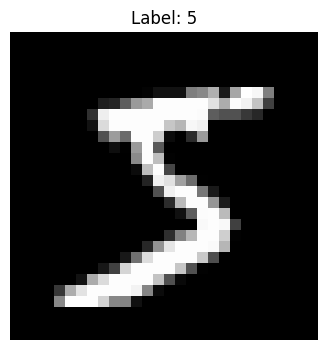

In [4]:

# Visualize an example image from the dataset
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')  # Display the first image in grayscale
plt.title(f'Label: {y_train[0]}')
plt.axis('off')  # Hide axis labels
plt.show()


In [ ]:

# Example model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model using the data generator
model_history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=30, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Display the model summary
model.summary()


Epoch 1/30
1875/1875 [==============================] - 106s 57ms/step - loss: 1.2100 - accuracy: 0.6402 - val_loss: 0.4589 - val_accuracy: 0.8595
Epoch 2/30
1875/1875 [==============================] - 102s 55ms/step - loss: 0.5571 - accuracy: 0.8235 - val_loss: 0.2424 - val_accuracy: 0.9225
Epoch 3/30
1875/1875 [==============================] - 115s 61ms/step - loss: 0.4429 - accuracy: 0.8602 - val_loss: 0.2150 - val_accuracy: 0.9349
Epoch 4/30
1875/1875 [==============================] - 111s 59ms/step - loss: 0.3865 - accuracy: 0.8783 - val_loss: 0.1785 - val_accuracy: 0.9417
Epoch 5/30
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3415 - accuracy: 0.8921 - val_loss: 0.1525 - val_accuracy: 0.9518
Epoch 6/30
1875/1875 [==============================] - 99s 53ms/step - loss: 0.3213 - accuracy: 0.8985 - val_loss: 0.1547 - val_accuracy: 0.9475
Epoch 7/30
1875/1875 [==============================] - 97s 52ms/step - loss: 0.3005 - accuracy: 0.9055 - val_loss: 0.18

In [ ]:

# Plot training and validation loss
loss_train = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(1, 31)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot training and validation accuracy
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1, 31)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Example of classification report (you need to adjust 'results' and 'predicted_results' according to your context)
results = model.predict_classes(x_val)
predicted_results = model.predict_classes(x_val)
Categories = [str(i) for i in range(10)]
class_report = classification_report(results, predicted_results, target_names=Categories)
print("Classification Report:\n", class_report)
